In [432]:
import torch
import matplotlib.pyplot as plt

In [433]:
torch.manual_seed(0)

# generate some random points to cluster cities around
clusters = torch.randn(3, 2) * 2

cluster1 = clusters[0]
cluster2 = clusters[1]
cluster3 = clusters[2]

In [434]:
# generate some random points to represent airport locations
airports = torch.randn(3, 2, requires_grad=True)

# generate some random points around the clusters to represent city locations
spread = 2
c1 = torch.randn(6, 2) * spread + cluster1
c2 = torch.randn(6, 2) * spread + cluster2
c3 = torch.randn(6, 2) * spread + cluster3

In [435]:
# calculate sum of squared distances from each city to each airport
def calculate_distance_to_airport(airport, cities):
    return (airport - cities).pow(2)

def calculate_total_distance(airports_):
    total = torch.zeros(1)
    for airport, cities in zip(airports_, [c1, c2, c3]):
        total += calculate_distance_to_airport(airport, cities).sum()
    return total

def plot():
    plt.scatter(c1[:, 0].data, c1[:, 1].data, color='red')
    plt.scatter(airports[0, 0].data, airports[0, 1].data, color=('red'), marker='x')
    plt.scatter(c2[:, 0].data, c2[:, 1].data, color='blue')
    plt.scatter(airports[1, 0].data, airports[1, 1].data, color=('blue'), marker='x')
    plt.scatter(c3[:, 0].data, c3[:, 1].data, color='green')
    plt.scatter(airports[2, 0].data, airports[2, 1].data, color=('green'), marker='x')
    plt.legend(['C1', 'airport 1', 'C2', 'airport2', 'C3', 'airport3'])
    plt.show()

iteration: 0


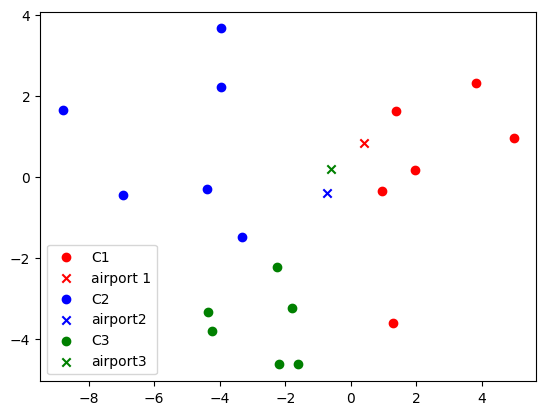

iteration: 1


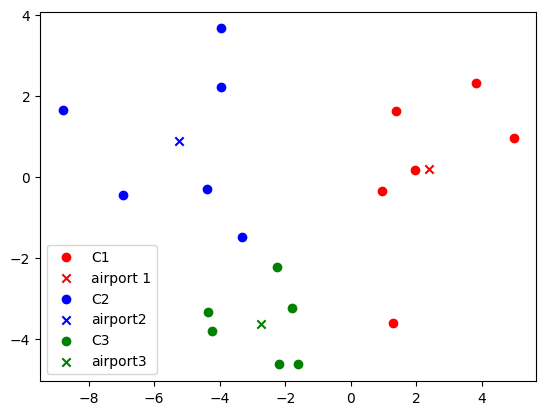

final airport locations: tensor([[ 2.3900,  0.1860],
        [-5.2334,  0.8847],
        [-2.7369, -3.6408]])


In [436]:
print("iteration: 0")
plot()

for i in range(1, 2):
    print("iteration:", i)

    # calculate the total distance
    distance = calculate_total_distance(airports)

    # calculate the gradient
    distance.backward()
    gradient = airports.grad

    # update the airports
    with torch.no_grad():
        # calculate hessian
        hessian = torch.autograd.functional.hessian(calculate_total_distance, airports).reshape(6, 6)

        # calculate hessian inverse
        hessian_inverse = torch.inverse(hessian)

        # update the airport locations
        airports -= (torch.matmul(hessian_inverse, gradient.reshape(6))).reshape(3, 2)

    airports.grad.zero_()
    plot()

print("final airport locations:", airports.data)
